In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints

(-0.5, 1523.5, 2031.5, -0.5)

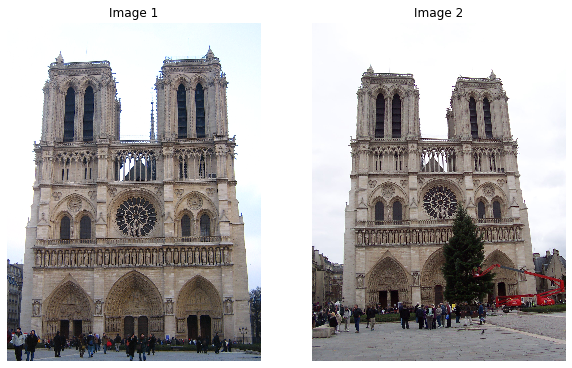

In [2]:
img1 = cv2.imread('../data/notre_dame1.jpg')
img2 = cv2.imread('../data/notre_dame2.jpg')



gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)

gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2[:,:,::-1])#,cmap='gray')
plt.title("Image 2")
plt.axis('off')
#plt.show()


In [3]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_gray_blur = cv2.GaussianBlur(img1_gray,(5,5),0)
#img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
Ix_ = cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,0,ksize=3)
Iy_ = cv2.Sobel(img1_gray_blur,cv2.CV_64F,0,1,ksize=3)  
Ixy_ = Ix_*Iy_ #cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,1,ksize=3) 
Ix = cv2.GaussianBlur(Ix_,(5,5),cv2.BORDER_DEFAULT) 
Ix2 = Ix * Ix
Iy = cv2.GaussianBlur(Iy_,(5,5),cv2.BORDER_DEFAULT) 
Iy2 = Iy * Iy
Ixy = cv2.GaussianBlur(Ixy_,(5,5),cv2.BORDER_DEFAULT) 

(-0.5, 1535.5, 2047.5, -0.5)

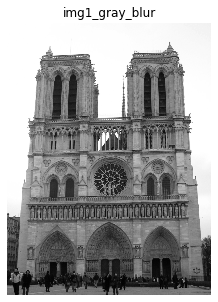

In [4]:
#img1_gray_blur
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1_gray_blur,cmap='gray')
plt.title("img1_gray_blur")
plt.axis('off')

(-0.5, 1535.5, 2047.5, -0.5)

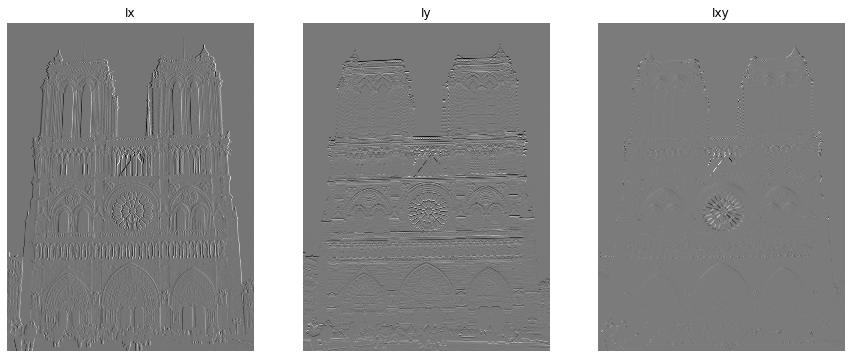

In [5]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(Ix,cmap='gray')
plt.title("Ix")
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(Iy,cmap='gray')
plt.title("Iy")
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(Ixy,cmap='gray')
plt.title("Ixy")
plt.axis('off')

In [6]:
Ix.shape

(2048, 1536)

In [7]:
img1_gray_blur.shape

(2048, 1536)

In [8]:
img1_gray.shape

(2048, 1536)

In [9]:
Response_mat = np.full((height,width), 0,  dtype=np.float)
Response_mat.shape

NameError: name 'height' is not defined

In [10]:
height = img1.shape[0]
width = img1.shape[1]
window_size = 5
corners = []
image2 = img1.copy()
color_img = image2#cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)
padding = int(window_size/2)
threshold = 10**8
alpha = 0.04
max = 0
total_r = 0
count_r = 0
wc = 0 # wild card
Response_mat = np.full((height,width), 0,  dtype=np.float)
for y in range(padding,height-padding):
  for x in range(padding,width-padding):
    windowIx2 = Ix2[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIxy = Ixy[y-padding:y+padding+1, x-padding:x+padding+1]
    windowIy2 = Iy2[y-padding:y+padding+1, x-padding:x+padding+1]
    Sx2 = windowIx2.sum()
    Sxy = windowIxy.sum()
    Sy2 = windowIy2.sum()
    # response function
    det = (Sx2 * Sy2) - (Sxy ** 2)
    trace = Sx2 + Sy2
    r = det - alpha*(trace**2)
    if r>max:
        max=r
    total_r += r
    count_r += 1
    try:
        Response_mat[x][y] = r
    except:
        wc +=1
    #color if greater than threshold
    if r>threshold:
      corners.append([x,y,r])
      color_img.itemset((y, x, 0), 0)
      color_img.itemset((y, x, 1), 0)
      color_img.itemset((y, x, 2), 255)
print("max r = ",max)
mean_r = total_r/count_r
print(mean_r)
print(wc)

max r =  609600772804.361
-1091686683.855774
781320


(-0.5, 1535.5, 2047.5, -0.5)

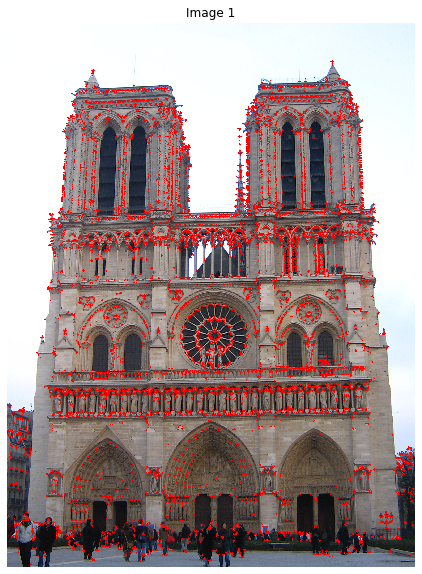

In [11]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(color_img[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')
# ax1 = fig.add_subplot(1,2,2)
# ax1.imshow(Response_mat)#,cmap='gray')
# plt.title("Image 1")
# plt.axis('off')

In [ ]:
# import plotly.graph_objects as go
# fig = go.Figure(data=[go.Surface(z=Response_mat)])

# fig.update_layout(title='Response matrix', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()




(-0.5, 1535.5, 2047.5, -0.5)

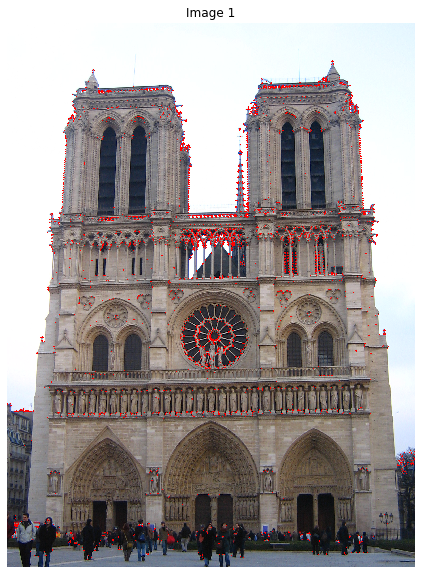

In [21]:
img_harris = img1.copy()
#gray = np.float32(gray)
dst = cv2.cornerHarris(img1_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_harris[dst>0.01*dst.max()]=[0,0,255]
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img_harris[:,:,::-1])
plt.title("Image 1")
plt.axis('off')

In [ ]:
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(img1_gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img_subpixel = img1.copy()
img_subpixel[res[:,1],res[:,0]]=[0,0,255]
img_subpixel[res[:,3],res[:,2]] = [0,255,0]
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img_subpixel[:,:,::-1])
plt.title("Image 1")
plt.axis('off')

In [42]:
arr = np.full((4,5), 0,  dtype=np.float)

In [43]:
arr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
a1 = np.array([[2,3],[4,5]])

In [21]:
a2 = np.array([[4,3],[2,5]])

In [22]:
a1*a2

array([[ 8,  9],
       [ 8, 25]])